## **DATA PRE-PROCESSING** ##
### **Importing Libraries** ###


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

/home/ghima/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


### **Importing Dataset** ###

In [2]:
#importing the dataset
data=pd.read_csv(r"/home/ghima/Desktop/Traffic_Telligence/traffic volume.csv")

### **Analysing Dataset** ###

In [3]:
#Analyzing the dataset
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


### **Handling Missing Values** ###

In [6]:
#checking the data
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [7]:
data['holiday'] = data['holiday'].fillna('None')

#### Here we can see that 'temp', 'rain', 'snow' have null values. ####
#### We will fill numerical columns with their mean values. ####

In [8]:

data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)
data['temp'].fillna(data['temp'].mean(), inplace=True)

#### We will fill categorical columns with their mode values. ####

In [9]:
from collections import Counter
Counter(data['weather'])
data['weather'] = data['weather'].fillna('Clouds')

In [10]:
#checking the data again
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

### **Data Visualization** ###

#### A correlation heatmap shows how strongly variables are related ####

<Axes: >

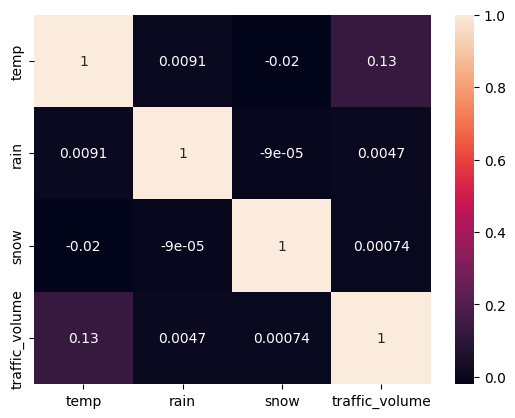

In [11]:
#Visualizing the data
#checking the cdata.select_dtypes(include='number').corr()
cor=data.select_dtypes(include='number').corr()
sns.heatmap(cor,annot=True)

#### A pair plot plots pairwise relationships in a dataset combinations of every numeric feature with every other. ####

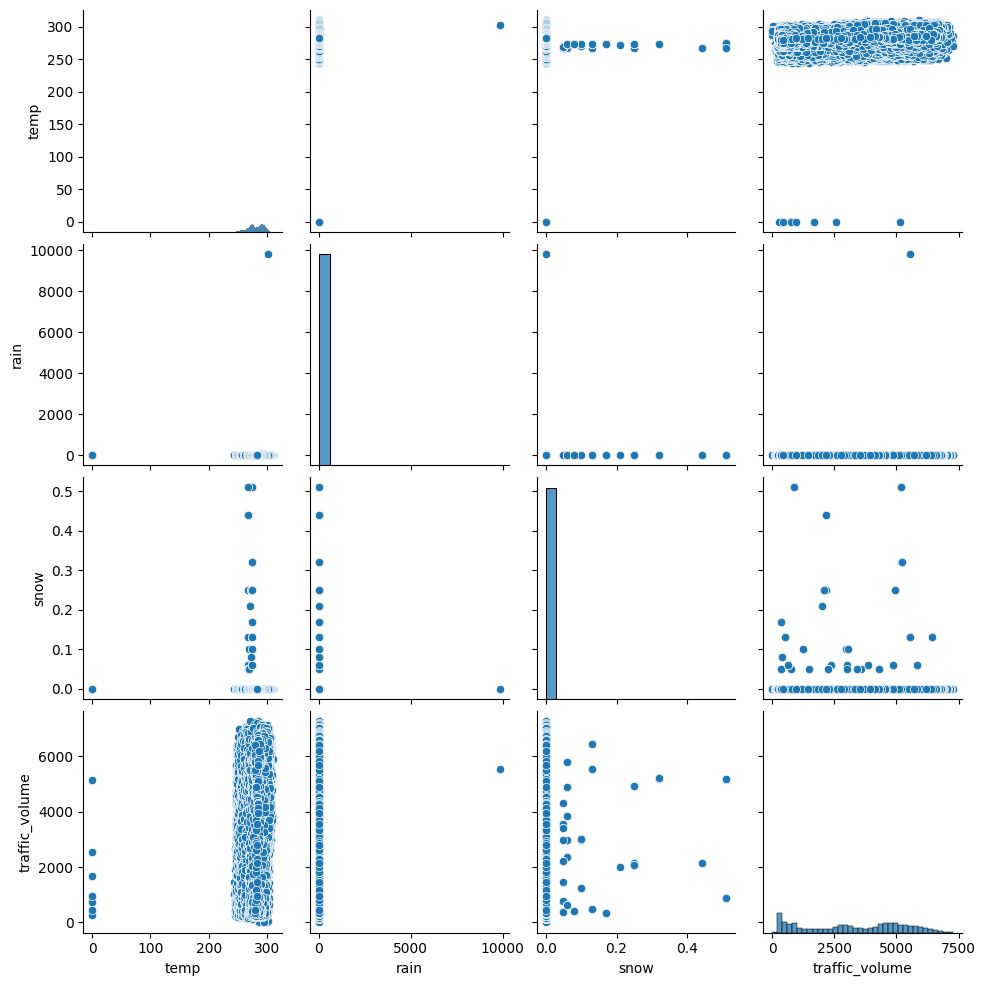

In [12]:
sns.pairplot(data)

#### A boxplot (or box-and-whisker plot) summarizes the distribution of a dataset based on five summary statistics: ####
1. Minimum
2. First quartile (Q1)
3. Median (Q2)
4. Third quartile (Q3)
5. Maximum 

<Axes: >

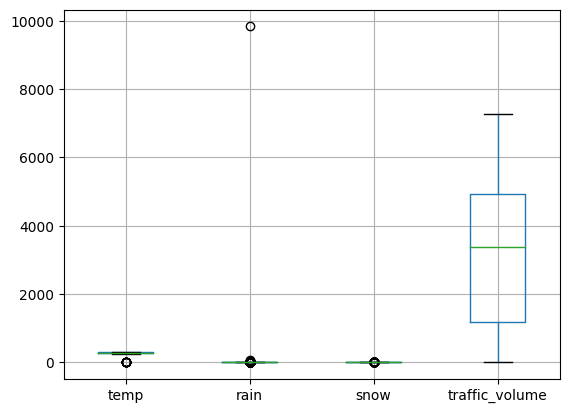

In [13]:
data.boxplot()

#### splitting the date column into day, month and year ####
#### splitting the time column into hours,minutes and seconds ####
#### dropping the date and time columns ####




In [14]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)
data.drop(columns=["date","Time"],axis=1,inplace=True)
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


#### Splitting the data into dependent and independent variables.The dependent variable is 'traffic_volume' and the independent variables are all other columns. ####

In [15]:

y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)
x.shape
y.shape

(48204,)

#### Encode all categorical columns and store the encoders #### 
#### Used StandardScaler and saved it ####



In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

categorical_cols = ['holiday', 'weather', 'day', 'month', 'year', 'hours', 'minutes', 'seconds']
label_encoders = {}

# Encode all categorical columns and store the encoders
for col in categorical_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str))
    label_encoders[col] = le  # Save the encoder for that column

with open("Flask/encoder.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Used StandardScaler and saved it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Saved the scaler
with open("Flask/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

x = pd.DataFrame(x_scaled, columns=x.columns)
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


### **Splitting the Data into Train and Test** ###

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## **Model Building** ##
### **Training and Testing the Model** ##

#### Initializing the model ####

In [18]:
#Training the model
#Initializing the models
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
xgb=xgboost.XGBRegressor()
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


#### fitting the models ####

In [19]:
#fitting the models
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Predicting the traffic volume ####

In [20]:
#predicting the traffic volume
pre1=lin_reg.predict(x_train)
pre2=Dtree.predict(x_train)
pre3=Rand.predict(x_train)
pre4=svr.predict(x_train)
pre5=xgb.predict(x_train)

### **Model Evaluation** ###

#### Regression metrics are R-squared_score, root mean squared error ####


In [21]:
#Model Evaluation
#Regression metrics are R-squared_score, root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
#These are r-squared scores for the test data
print(r2_score(pre1,y_train))
print(r2_score(pre2,y_train))
print(r2_score(pre3,y_train))
print(r2_score(pre4,y_train))
print(r2_score(pre5,y_train))

-5.517285423636856
1.0
0.9748164097384269
-12.18810423138228
0.8472604817696772


#### R-Squared score is a measure of how well the model fits the data. ####
#### A score of 1 means the model perfectly fits the data, while a score of 0 means the model does not fit the data at all. ####



In [22]:
#R-Squared score is a measure of how well the model fits the data.
#A score of 1 means the model perfectly fits the data, while a score of 0 means the model does not fit the data at all.
#These are r-squared scores for the test data
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=xgb.predict(x_test)
print(r2_score(p1,y_test))
print(r2_score(p2,y_test))
print(r2_score(p3,y_test))
print(r2_score(p4,y_test))
print(r2_score(p5,y_test))              

-5.399396398322172
0.6971097689711474
0.8034086602724523
-11.972215715232423
0.8065613781045625


#### So we can see that the Random Forest Regressor has the highest R-squared score, which means it fits the data better than the other models. ####
 

In [23]:
#So we can see that the Random Forest Regressor has the highest R-squared score, which means it fits the data better than the other models.
#We can also use the root mean squared error to evaluate the model.
#RMSE is a measure of how well the model predicts the data.
#The lower the RMSE, the better the model fits the data.
print(sqrt(mean_squared_error(y_test,p1)))
print(sqrt(mean_squared_error(y_test,p2)))
print(sqrt(mean_squared_error(y_test,p3)))



1838.3976719006828
1089.0792014364008
797.8496682783742


### **Saving the model** ###

In [24]:
#Saving the model
import pickle
pickle.dump(Rand, open('Flask/traffic_volume_model.pkl', 'wb'))
